In [107]:
import pandas as pd

In [108]:
reaction = pd.read_csv('data/Reactions.csv')
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [109]:
rxntype = pd.read_csv('data/ReactionTypes.csv')
rxntype.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [110]:
content = pd.read_csv('data/Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


### Cleaning Data

In [111]:
content.drop('Unnamed: 0', axis=1, inplace=True)
reaction.drop('Unnamed: 0', axis=1, inplace=True)


In [112]:
rxntype.drop('Unnamed: 0', axis=1, inplace=True)

In [113]:
reaction.shape

(25553, 4)

In [114]:
rxntype.dtypes

Type         object
Sentiment    object
Score         int64
dtype: object

In [115]:
content.dtypes

Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [116]:
#removing columns that may not be relevant
reaction.drop(['User ID'], axis=1, inplace=True)

In [117]:
reaction.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [118]:
rxntype.drop(['Sentiment'], axis=1, inplace=True)
content.drop(['User ID', 'URL'], axis=1, inplace=True)

In [119]:
rxntype.head()

,Type,Score
0,heart,60
1,want,70
2,disgust,0
3,hate,5
4,interested,30


In [120]:
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [121]:
#Removing all datasets containging null values/blank spaces
content.dropna(how='any', inplace=True)
reaction.dropna(how='any', inplace=True)
rxntype.dropna(how='any', inplace=True)

In [122]:
rxntype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    16 non-null     object
 1   Score   16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


### Data Modeling

In [123]:
#merging 3 tables together
newdf = pd.merge(reaction, rxntype, how='inner', on=['Type'])
# newdf = newdf.rename(columns={'Type_y': 'Content Type'})
newdf.head()

,Content ID,Type,Datetime,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,0


In [124]:
resdf = pd.merge(content, newdf, how='inner', on=['Content ID'])
resdf.head()

,Content ID,Type_x,Category,Type_y,Datetime,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2020-11-09 02:49:59,10


In [135]:
resdf = resdf.rename(columns={'Type_x': 'Content Type', 'Type_y':'Rxn Type'})
resdf.head()

,Content ID,Content Type,Category,Rxn Type,Datetime,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2020-11-09 02:49:59,10


In [136]:
resdf.to_csv('data/cleaned-data.csv')

In [137]:
resdf['Category'] = resdf['Category'].str.replace(r'"([^"]+)"', r'\1')

<ipython-input-137-4debcc1c8c96>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  resdf['Category'] = resdf['Category'].str.replace(r'"([^"]+)"', r'\1')


In [138]:
resdf['Category'] = resdf['Category'].str.replace(r'\b([A-Z][a-z]*)\b', lambda x: x.group().lower())


<ipython-input-138-d83b26b30fc5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  resdf['Category'] = resdf['Category'].str.replace(r'\b([A-Z][a-z]*)\b', lambda x: x.group().lower())


In [139]:
resdf.Category.value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [140]:
#Top 5 performing categories
top5 = resdf.groupby('Category')['Score'].sum()
top5 = top5.sort_values(ascending=False)
top5 = top5.head(5)
top5

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

In [141]:
top5.to_csv('data/top5categories.csv')

### Data Visualization

In [142]:
import matplotlib.pyplot as plt

In [143]:
top5 = pd.DataFrame(top5)
top5.head()

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


array([<AxesSubplot:ylabel='Score'>], dtype=object)

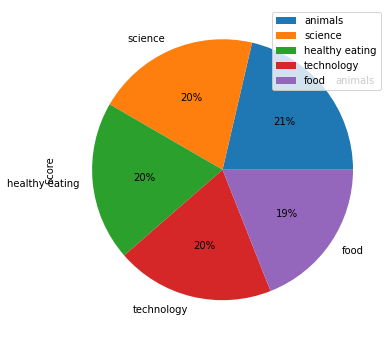

In [144]:
top5.plot(kind='pie', figsize=(10,6), autopct='%1.0f%%', subplots=True)

<AxesSubplot:xlabel='Category'>

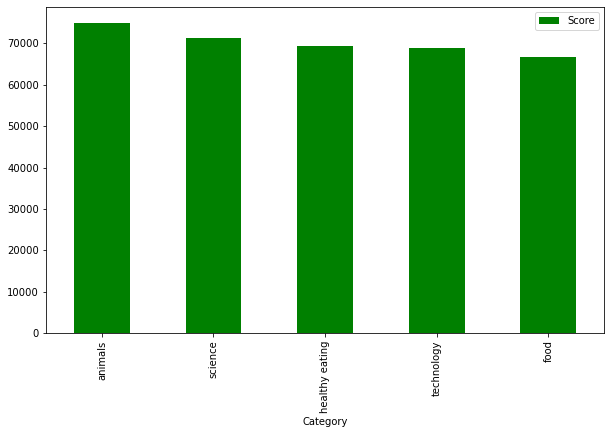

In [145]:
top5.plot(kind='bar', figsize=(10,6), color='green')

### Some Storytelling

#### The below code shows all the unique categories that exist within the dataset.

In [154]:
#all unique categories
un = resdf['Category'].unique()
un.shape

(16,)

#### The below calculations show that the total number of reactions of the most popular category, which is Travel, is 1368.

In [150]:
#total reactions of the most popular category
traveldf = resdf.loc[resdf['Category']=='animals']
traveldf.head()

,Content ID,Content Type,Category,Rxn Type,Datetime,Score,month
910,07f88a73-aef2-45fd-8b5d-418e448b853d,GIF,animals,scared,2021-05-24 20:32:26,15,5
911,07f88a73-aef2-45fd-8b5d-418e448b853d,GIF,animals,cherish,2021-03-12 16:22:28,70,3
912,07f88a73-aef2-45fd-8b5d-418e448b853d,GIF,animals,cherish,2021-03-02 14:45:28,70,3
913,07f88a73-aef2-45fd-8b5d-418e448b853d,GIF,animals,hate,2020-12-27 03:37:01,5,12
914,07f88a73-aef2-45fd-8b5d-418e448b853d,GIF,animals,hate,2021-01-19 22:28:57,5,1


In [151]:
traveldf['Rxn Type'].shape[0]

1897

#### The below code shows that the month with the most posts is August.

In [155]:
#month with the most posts
import datetime
resdf['month'] = pd.DatetimeIndex(resdf['Datetime']).month
resdf.head()

,Content ID,Content Type,Category,Rxn Type,Datetime,Score,month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,0,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,0,4
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,10,6
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2020-11-09 02:49:59,10,11


In [156]:
resdf['month'].value_counts()

5     2138
1     2126
8     2114
12    2092
7     2070
10    2056
11    2034
9     2022
6     2021
3     2012
4     1974
2     1914
Name: month, dtype: int64